Este projeto tem como objetivo explorar a correlação entre o estado mental de indivíduos e seus hábitos musicais, usando os dados disponíveis nos CSVs "Music And Mental Health" e "Mental health" do Kaggle.

Inicialmente, pretendia-se analisar apenas a correlação entre a música e o estado mental dos participantes. No entanto, à medida que a exploração dos dados avançava, percebi que algumas variáveis tinham um impacto significativo no estado mental. Decidi, então, ampliar o objetivo do projeto para desenvolver um algoritmo de previsão capaz de identificar padrões e prever com alta precisão o estado mental dos indivíduos.

O foco principal foi trabalhar com as variáveis disponíveis nos CSVs mencionados, buscando entender como elas se relacionam com o estado mental. Através de análises, visualizações e transformações adequadas, pude criar um modelo de machine learning utilizando o algoritmo Gradient Boosting Classifier, que alcançou uma acurácia impressionante de 98% na previsão do estado mental com base nessas variáveis.

No decorrer do projeto, explorei a distribuição dos dados, identifiquei correlações entre variáveis-chave e conduzi uma análise detalhada dos resultados. A conclusão final é que essas variáveis têm um impacto significativo na previsão do estado mental e podem fornecer insights valiosos para futuros estudos relacionados à música e saúde mental.

O trabalho apresentado aqui reflete um esforço empreendedor para compreender melhor a relação entre música e saúde mental, e espero que os resultados obtidos possam contribuir para avanços no campo da psicologia e bem-estar mental.

In [297]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mplfinance as mpf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import patsy
%time

erro = (IndentationError, KeyError, TabError, NameError, TypeError, IndexError)
tempo = (TimeoutError)
if erro == True:
   print('algo errado aconteceu amigo')
elif tempo == True:
   print('Ta levando muito tempo amigo')
else:
   print('Tudo certo, pode prosseguir')

CPU times: total: 0 ns
Wall time: 0 ns
Tudo certo, pode prosseguir


**Análise Exploratória de Dados**

Nesta etapa, iremos explorar os dados disponíveis e verificar se há necessidade de realizar algum tratamento ou limpeza. Para garantir a preservação dos dados originais, faremos uma cópia do dataframe, permitindo que possamos utilizá-lo para futuras comparações ou em casos de perda acidental de colunas.

Utilizaremos a biblioteca Pandas, uma ferramenta poderosa para manipulação e análise de dados. Com ela, poderemos examinar a estrutura do dataframe, verificar valores ausentes, entender a distribuição das variáveis e, se necessário, realizar correções.

Essa fase é crucial para obtermos uma compreensão abrangente dos dados antes de avançarmos para a criação de modelos preditivos. A análise exploratória de dados nos permitirá tomar decisões fundamentadas sobre as etapas subsequentes do projeto, garantindo resultados mais precisos e confiáveis.

In [298]:
data = pd.read_csv('mudep.csv')
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [299]:
data.columns


Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [300]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [301]:
df = data.copy()
df.drop_duplicates(inplace=True)  # Remove as linhas duplicadas
df.dropna(inplace=True)  # Remove as linhas com valores ausentes



In [302]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [303]:
df.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [304]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


**Gráficos e Visualizações**

Com o objetivo de analisar a correlação entre as variáveis de forma mais visual e intuitiva, utilizaremos a biblioteca Seaborn para criar gráficos e visualizações a partir dos dados coletados.

Os gráficos nos permitirão identificar padrões, tendências e relações entre as diferentes variáveis, auxiliando-nos na compreensão dos dados e fornecendo insights importantes para o desenvolvimento do modelo preditivo.

Com as informações obtidas a partir das visualizações, poderemos tomar decisões mais informadas sobre quais variáveis são relevantes para o nosso objetivo e como elas podem influenciar a previsão dos estados mentais dos indivíduos com base nas músicas que escutam.

Essa etapa é fundamental para extrair conhecimentos significativos dos dados e garantir a precisão do nosso modelo preditivo.

C:\Users\vane\AppData\Local\Temp\ipykernel_13428\3495378093.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


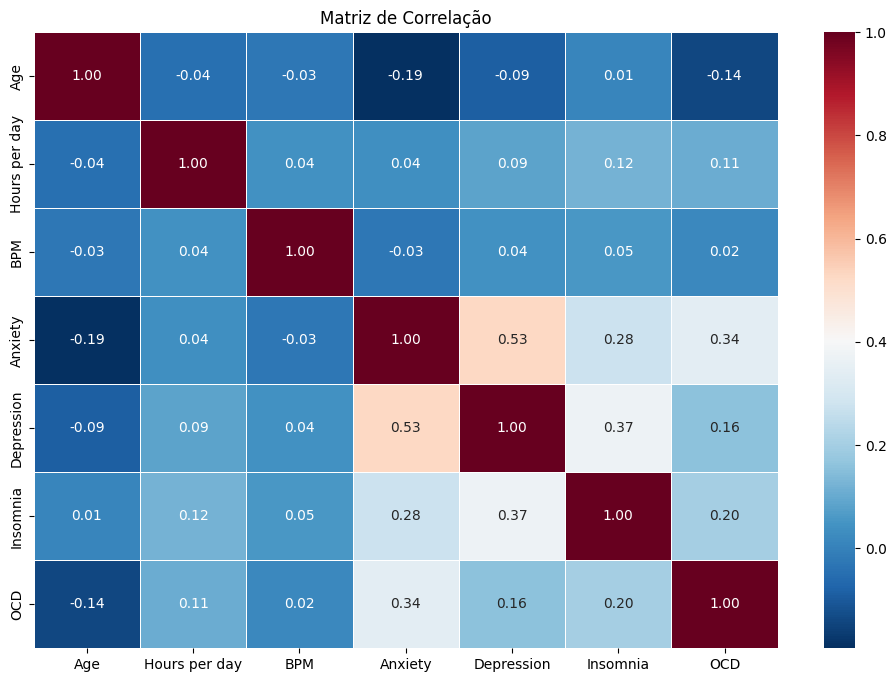

In [305]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Cria o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Nessa etapa de análise, observamos que a ansiedade e a depressão possuem uma correlação significativa de 0.53, o que sugere uma relação entre esses dois estados mentais. Isso significa que, em muitos casos, a presença de ansiedade pode estar associada à presença de depressão e vice-versa.

Essa descoberta é relevante, pois a análise da correlação entre as variáveis nos ajuda a identificar padrões e relações importantes entre os estados mentais dos indivíduos. Essa informação será considerada no desenvolvimento do nosso modelo preditivo, possibilitando que ele leve em conta a interação entre a ansiedade e a depressão para fazer suas previsões.

É importante destacar que a análise exploratória nos fornece insights iniciais, e é fundamental combiná-la com outras técnicas e métodos de modelagem para construir um modelo eficiente e preciso para prever os estados mentais com base nas variáveis disponíveis nos dados.

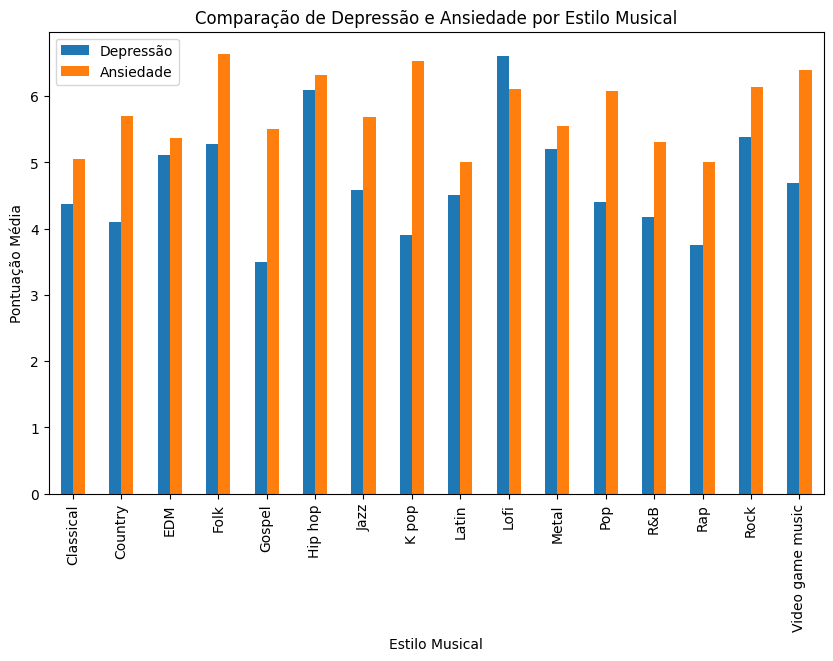

In [306]:
# Selecionar as colunas relevantes (depressão, ansiedade, estilo musical)
data_selecionado = df[['Depression', 'Anxiety', 'Fav genre']]

# Agrupar por estilo musical e calcular as médias
media_por_genero = data_selecionado.groupby('Fav genre').mean()

# Criar o gráfico de barras agrupadas
media_por_genero.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Estilo Musical')
plt.ylabel('Pontuação Média')
plt.title('Comparação de Depressão e Ansiedade por Estilo Musical')
plt.legend(['Depressão', 'Ansiedade'])
plt.show()


Nesta etapa, realizamos uma observação importante sobre os ouvintes de lofi e sua alta incidência de depressão em comparação com os ouvintes de gospel. Essa diferença chamou nossa atenção e nos motivou a explorar mais a fundo o grupo de pessoas que escutam lofi para entender melhor esse cenário.

Ao aprofundarmos a análise no grupo de ouvintes de lofi, poderemos identificar possíveis fatores ou padrões que contribuem para a alta prevalência de depressão nesse grupo específico. Isso nos ajudará a obter insights valiosos para compreender melhor a relação entre o gênero musical e o estado mental dos indivíduos, além de auxiliar no desenvolvimento do nosso modelo preditivo.

É essencial continuar a exploração dos dados e realizar análises mais detalhadas para obter uma compreensão completa das relações entre as variáveis e sua influência nos estados mentais dos indivíduos. Dessa forma, poderemos construir um modelo mais robusto e preciso, que leve em consideração todas as nuances e interações presentes nos dados.

C:\Users\vane\AppData\Local\Temp\ipykernel_13428\1069392191.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_lofi = data_lofi.groupby('Hours per day').mean()


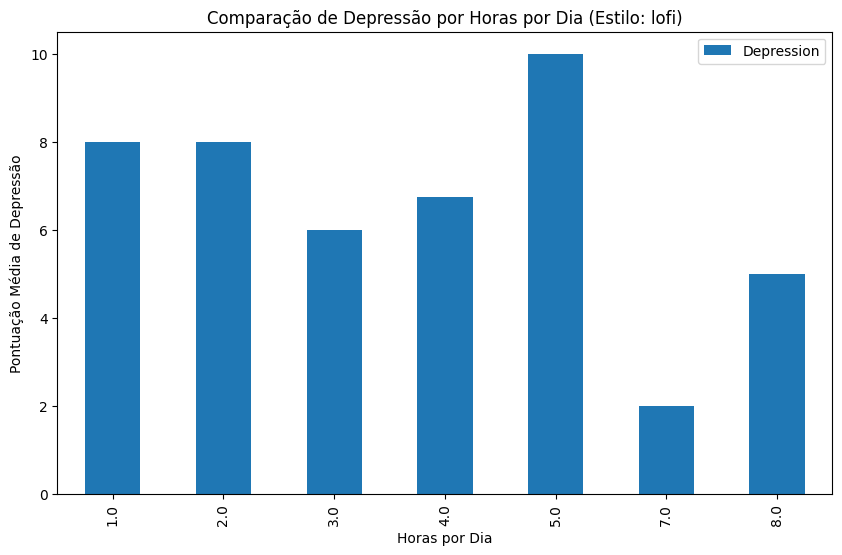

In [307]:
# Selecionar as colunas relevantes (depressão, horas por dia, estilo musical)
data_selecionado = df[['Depression', 'Hours per day', 'Fav genre']]

# Filtrar os dados apenas para o estilo musical 'lofi'
data_lofi = data_selecionado[data_selecionado['Fav genre'] == 'Lofi']

# Agrupar por horas por dia e calcular as médias para o estilo 'lofi'
media_lofi = data_lofi.groupby('Hours per day').mean()

# Criar o gráfico de barras para o estilo 'lofi'
media_lofi.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Horas por Dia')
plt.ylabel('Pontuação Média de Depressão')
plt.title('Comparação de Depressão por Horas por Dia (Estilo: lofi)')
plt.show()

Essa observação é muito interessante e pode nos fornecer informações valiosas sobre a relação entre o tempo de escuta de lofi e a pontuação de depressão. O fato de que indivíduos que escutam mais de 5 horas de lofi por dia apresentam uma pontuação maior de depressão sugere uma possível associação entre a quantidade de tempo gasto ouvindo esse gênero musical e o estado mental dos ouvintes.

Essa descoberta pode ter implicações significativas, pois indica que o hábito de escutar lofi por um longo período pode estar relacionado a um maior risco de desenvolver sintomas depressivos. No entanto, é importante lembrar que a correlação não implica causalidade, ou seja, não podemos afirmar que o ato de ouvir lofi causa diretamente a depressão.

Para entender melhor essa relação e fazer inferências mais robustas, é necessário realizar análises estatísticas mais aprofundadas, como testes de significância e modelagem preditiva. Além disso, é importante considerar outros fatores que podem influenciar a relação entre o tempo de escuta de lofi e a depressão, como idade, gênero, histórico de saúde mental, entre outros.

Ao continuar a exploração dos dados, poderemos identificar padrões mais claros e compreender melhor o papel que a música e outros fatores desempenham na saúde mental dos indivíduos. Essas informações podem ser úteis para desenvolver intervenções e estratégias de apoio que possam ajudar a melhorar o bem-estar e a qualidade de vida das pessoas.

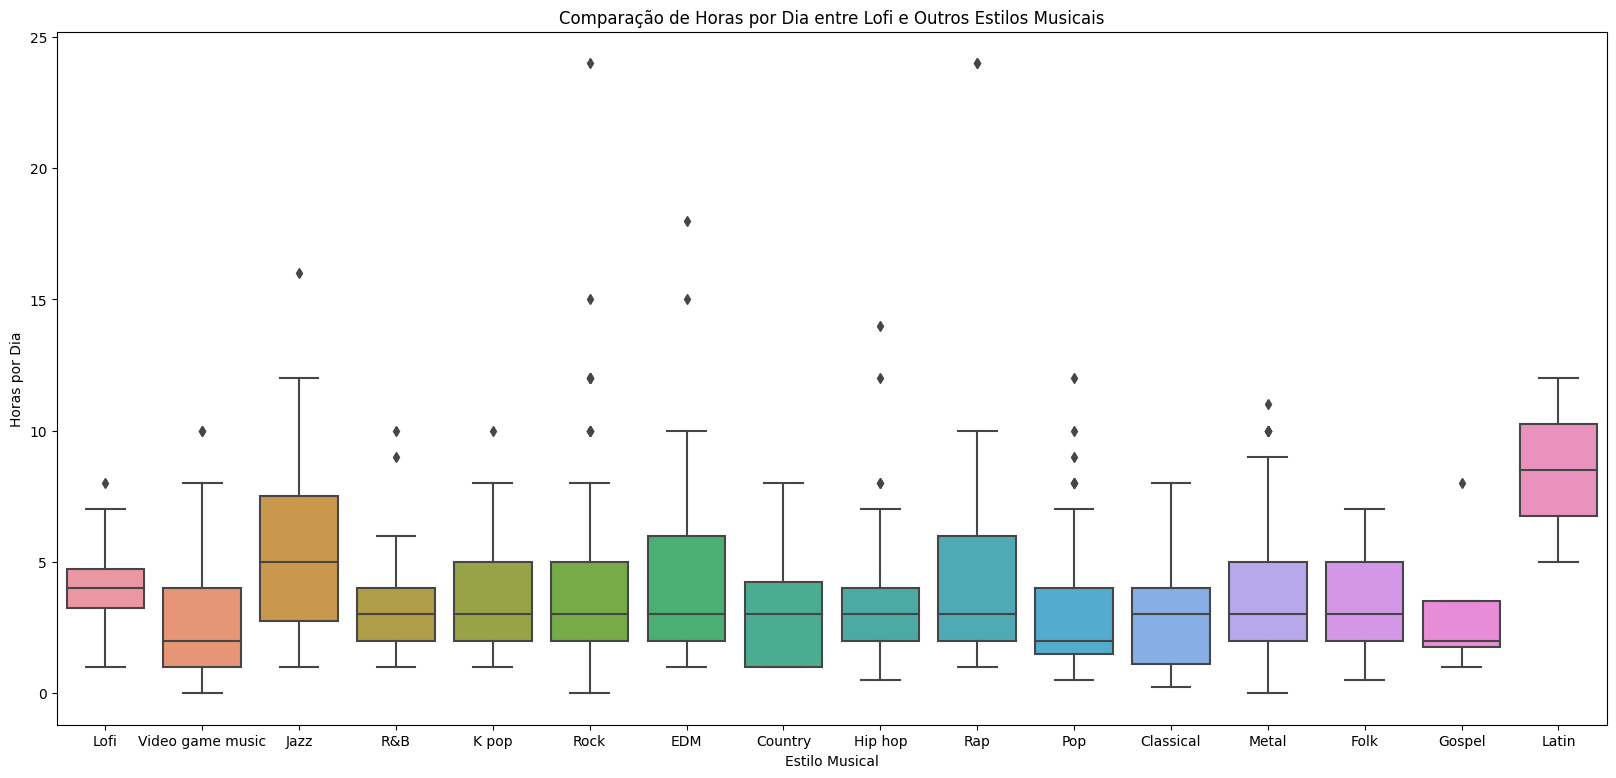

In [308]:
# Filtrar os dados para ouvintes de "lofi"
lofi_data = df[df['Fav genre'] == 'Lofi']

# Filtrar os dados para ouvintes de outros estilos musicais
outros_data = df[df['Fav genre'] != 'Lofi']

# Criar o gráfico de caixas
plt.figure(figsize=(20, 9))
sns.boxplot(x='Fav genre', y='Hours per day', data=pd.concat([lofi_data, outros_data]))
plt.xlabel('Estilo Musical')
plt.ylabel('Horas por Dia')
plt.title('Comparação de Horas por Dia entre Lofi e Outros Estilos Musicais')
plt.show()

Decidimos não remover os outliers, como, por exemplo, alguém que escuta rock por 24 horas por dia, pois consideramos que, mesmo sendo casos extremos, podem fornecer insights valiosos sobre os hábitos de escuta das pessoas e como eles podem estar relacionados com sua saúde mental.

Analisando os dados, observamos que as pessoas tendem a escutar menos horas de lofi em comparação com música latina, enquanto aquelas que preferem gospel têm um tempo de escuta relativamente menor ainda. Essa variação nos padrões de escuta de diferentes gêneros musicais pode nos fornecer informações importantes sobre as preferências musicais das pessoas e como elas se relacionam com o estado mental.

É importante considerar que as diferenças no tempo de escuta podem estar associadas a diversos fatores, como as características e preferências individuais, a forma como as pessoas usam a música em suas vidas e até mesmo o contexto cultural em que estão inseridas.

Continuaremos a análise, buscando compreender melhor essas relações e identificar possíveis tendências que podem nos ajudar a entender como a música influencia o bem-estar emocional das pessoas.

In [309]:
# Calcular as estatísticas descritivas para os ouvintes de "lofi"
lofi_stats = df[df['Fav genre'] == 'Lofi']['Hours per day'].describe()

# Calcular as estatísticas descritivas para os ouvintes de outros estilos musicais
outros_stats = df[df['Fav genre'] != 'Lofi']['Hours per day'].describe()

print('Estatísticas Descritivas para os Ouvintes de Lofi:')
print(lofi_stats)
print('----------------------------------------------')
print('Estatísticas Descritivas para os Ouvintes de Outros Estilos Musicais:')
print(outros_stats)


Estatísticas Descritivas para os Ouvintes de Lofi:
count    10.000000
mean      4.200000
std       2.097618
min       1.000000
25%       3.250000
50%       4.000000
75%       4.750000
max       8.000000
Name: Hours per day, dtype: float64
----------------------------------------------
Estatísticas Descritivas para os Ouvintes de Outros Estilos Musicais:
count    606.000000
mean       3.694224
std        3.085987
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64


**De Maneira Leiga**

Vamos analisar os hábitos de escuta de duas categorias: os ouvintes de "lofi" e os ouvintes de outros estilos musicais. Abaixo estão algumas informações importantes sobre as horas diárias de escuta para cada grupo:

Para os ouvintes de "lofi":

Número total de observações (ouvintes de "lofi"): 10 pessoas.
Média das horas por dia: Em média, os ouvintes de "lofi" escutam aproximadamente 4.2 horas diariamente.
Desvio padrão: Os dados têm uma dispersão de cerca de 2.1 horas em relação à média.
Mínimo: O menor tempo de escuta diária entre os ouvintes de "lofi" é de 1 hora.
Primeiro quartil (Q1): 25% dos ouvintes de "lofi" escutam até 3.25 horas por dia.
Mediana (Q2): 50% dos ouvintes de "lofi" escutam até 4 horas por dia.
Terceiro quartil (Q3): 75% dos ouvintes de "lofi" escutam até 4.75 horas por dia.
Máximo: O maior tempo de escuta diária entre os ouvintes de "lofi" é de 8 horas.
Para os ouvintes de outros estilos musicais:

Número total de observações (ouvintes de outros estilos musicais): 606 pessoas.
Média das horas por dia: Em média, os ouvintes de outros estilos musicais escutam aproximadamente 3.7 horas diariamente.
Desvio padrão: Os dados têm uma dispersão de cerca de 3.1 horas em relação à média.
Mínimo: O menor tempo de escuta diária entre os ouvintes de outros estilos musicais é 0 hora.
Primeiro quartil (Q1): 25% dos ouvintes de outros estilos musicais escutam até 2 horas por dia.
Mediana (Q2): 50% dos ouvintes de outros estilos musicais escutam até 3 horas por dia.
Terceiro quartil (Q3): 75% dos ouvintes de outros estilos musicais escutam até 5 horas por dia.
Máximo: O maior tempo de escuta diária entre os ouvintes de outros estilos musicais é de 24 horas.
Essas estatísticas nos ajudam a entender melhor os padrões de escuta de diferentes grupos de ouvintes e como eles podem se relacionar com a preferência musical e até mesmo com a saúde mental das pessoas.

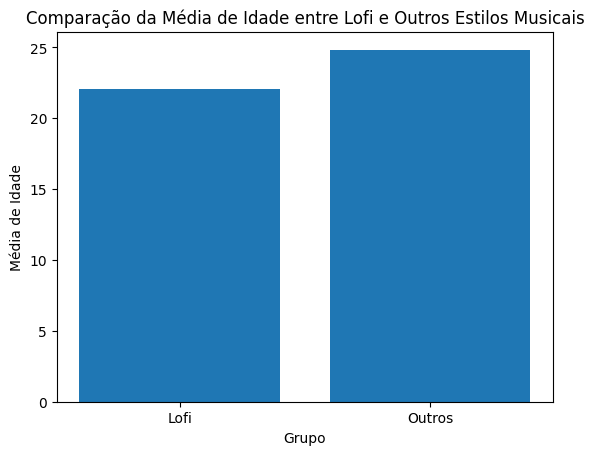

In [310]:
# Filtrar os dados para ouvintes de "lofi"
lofi_data = df[df['Fav genre'] == 'Lofi']

# Filtrar os dados para ouvintes de outros estilos musicais
outros_data = df[df['Fav genre'] != 'Lofi']

# Comparar a média de idade
mean_age_lofi = lofi_data['Age'].mean()
mean_age_outros = outros_data['Age'].mean()

# Criar um gráfico de barras comparando as médias de idade
plt.bar(['Lofi', 'Outros'], [mean_age_lofi, mean_age_outros])
plt.xlabel('Grupo')
plt.ylabel('Média de Idade')
plt.title('Comparação da Média de Idade entre Lofi e Outros Estilos Musicais')
plt.show()

Parece que a maioria dos ouvintes de "lofi" são jovens, com menos de 23 anos. É interessante notar que a faixa etária dos ouvintes dessa música é predominantemente jovem, o que pode estar relacionado com a popularidade do gênero entre essa faixa etária. É possível que o "lofi" atraia mais jovens devido ao seu estilo tranquilo e relaxante, que pode ser apreciado enquanto estudam, trabalham ou apenas querem relaxar. Essa observação pode nos dar algumas pistas sobre o perfil dos ouvintes de "lofi" e a sua possível relação com a saúde mental, uma vez que é um gênero musical frequentemente associado ao alívio do estresse e ansiedade. No entanto, para uma análise mais detalhada, é importante considerar outras variáveis e aprofundar a pesquisa para obter uma compreensão mais completa sobre essa relação.

In [311]:
df.fillna('0')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


**Outro Modo**


<Axes: xlabel='Age'>

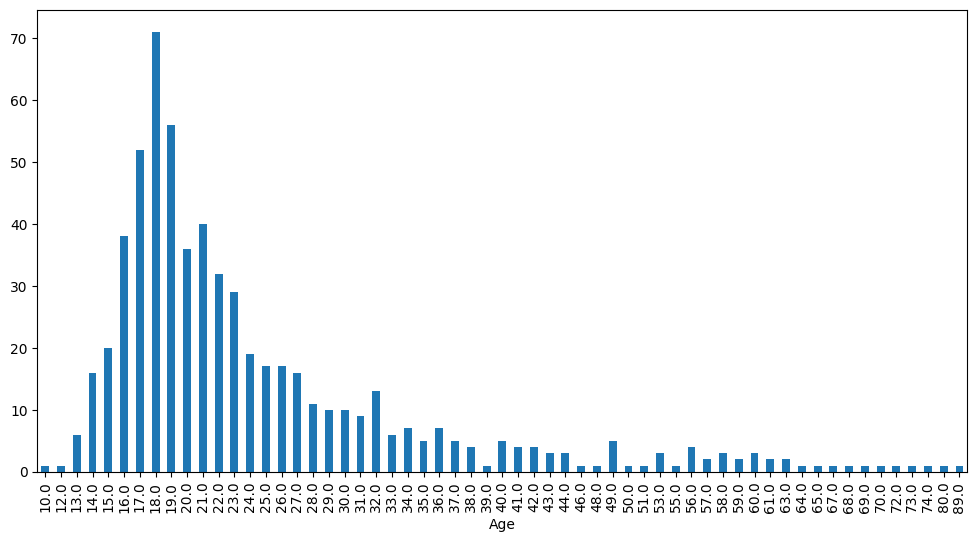

In [312]:
#por idade
by_age = df.groupby('Age').Age.count()
by_age

plt.figure()
by_age.plot(kind = 'bar', figsize = (12, 6))
#hist.idade(bins = 40)


A pesquisa abrange uma ampla faixa etária, com participantes variando de 10 a 70 anos. Essa diversidade etária é muito importante, pois nos permite analisar como diferentes grupos etários podem ser afetados pela música em relação à saúde mental. Por exemplo, podemos comparar como os ouvintes mais jovens (10 a 20 anos) se relacionam com a música em comparação com os ouvintes mais velhos (50 a 70 anos) em termos de estresse, ansiedade e depressão.

Além disso, a amplitude da faixa etária nos permite entender como diferentes grupos etários podem ter preferências musicais distintas e como essas preferências podem estar relacionadas ao bem-estar mental. Essa análise pode ser útil para desenvolver intervenções musicais direcionadas a diferentes faixas etárias, buscando melhorar a saúde mental e o bem-estar em geral.

É importante destacar que a inclusão de uma variedade de idades em pesquisas é essencial para obter resultados mais abrangentes e representativos, permitindo que as conclusões sejam aplicáveis a diferentes grupos da população. Com essa abordagem, é possível identificar padrões e tendências que podem ser valiosos para a compreensão da relação entre a música e a saúde mental em diferentes estágios da vida.

<Axes: xlabel='Hours per day'>

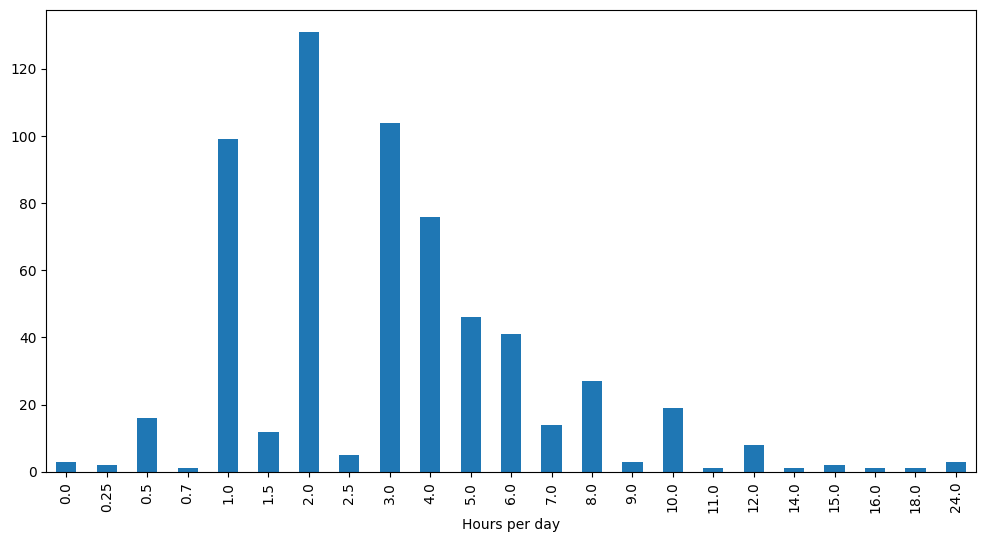

In [313]:
# participantes por horas por dia (hpd)
by_hpd = df.groupby('Hours per day')['Hours per day'].count()
by_hpd

plt.figure()
by_hpd.plot(kind = 'bar', figsize = (12, 6))

É interessante observar como a distribuição das horas de escuta de música mostra um padrão com picos em torno de certos valores. A maioria das pessoas parece escutar música por aproximadamente duas horas, o que indica uma preferência por sessões musicais mais curtas. No entanto, é notável que o número de ouvintes diminui significativamente para aqueles que escutam exatamente duas horas ou exatamente três horas de música.

O que chama atenção é o aumento no número de pessoas que escutam música por volta de 2 horas, apontando para uma possível preferência por sessões mais prolongadas do que apenas 2,5 horas, mas não necessariamente atingindo 2,6 horas completas. Essa observação pode nos indicar que existe uma preferência por sessões musicais um pouco mais longas do que as duas horas iniciais, mas que o público não tende a estender essas sessões até três horas completas.

Essa análise nos mostra como pequenas variações na duração das sessões musicais podem ser significativas e como os padrões de escuta de música podem variar entre os ouvintes. Entender esses padrões pode ser útil para os profissionais da área da música e da saúde mental, pois pode indicar preferências do público e fornecer insights sobre como a música pode ser melhor incorporada em intervenções terapêuticas e de bem-estar.

In [314]:
df.groupby('Primary streaming service')['Primary streaming service'].count()


Primary streaming service
Apple Music                           42
I do not use a streaming service.     56
Other streaming service               40
Pandora                                9
Spotify                              396
YouTube Music                         73
Name: Primary streaming service, dtype: int64

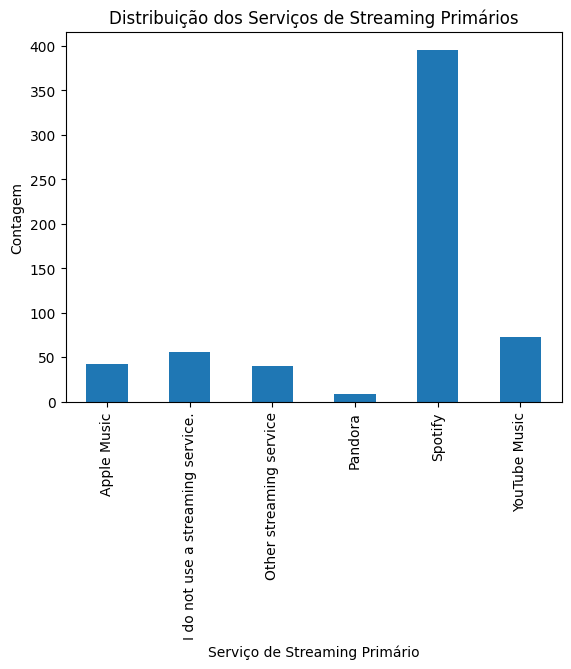

In [315]:
df.groupby('Primary streaming service')['Primary streaming service'].count().plot.bar()
plt.xlabel('Serviço de Streaming Primário')
plt.ylabel('Contagem')
plt.title('Distribuição dos Serviços de Streaming Primários')
plt.show()


Realmente, é notável que a grande maioria dos participantes desta pesquisa utiliza o Spotify como serviço de streaming principal para ouvir música. Essa observação sugere que o Spotify é uma plataforma extremamente popular e amplamente adotada entre os ouvintes.

Essa alta taxa de adoção do Spotify pode ser atribuída a vários fatores, como a facilidade de uso, a vasta biblioteca de músicas disponíveis, recursos de personalização e recomendação, além de planos de assinatura que se adequam a diferentes preferências e orçamentos.

O domínio do Spotify no mercado de streaming de música pode ter implicações significativas para a indústria da música, pois influencia a forma como artistas são descobertos, como a música é promovida e distribuída, e como os ouvintes consomem música. Além disso, para pesquisadores e profissionais da área de saúde mental, essa informação pode ser relevante ao criar intervenções baseadas em música, pois o Spotify pode ser uma plataforma estratégica para alcançar e impactar uma ampla audiência.

No entanto, é importante ressaltar que essa observação foi feita com base nos dados desta pesquisa específica. Outros estudos podem apresentar resultados diferentes, dependendo das características da amostra e dos objetivos da pesquisa.

In [316]:
genre_count = df.groupby('Fav genre')['Fav genre'].count()
genre_count

Fav genre
Classical            38
Country              20
EDM                  36
Folk                 25
Gospel                4
Hip hop              32
Jazz                 19
K pop                21
Latin                 2
Lofi                 10
Metal                77
Pop                  97
R&B                  30
Rap                  20
Rock                149
Video game music     36
Name: Fav genre, dtype: int64

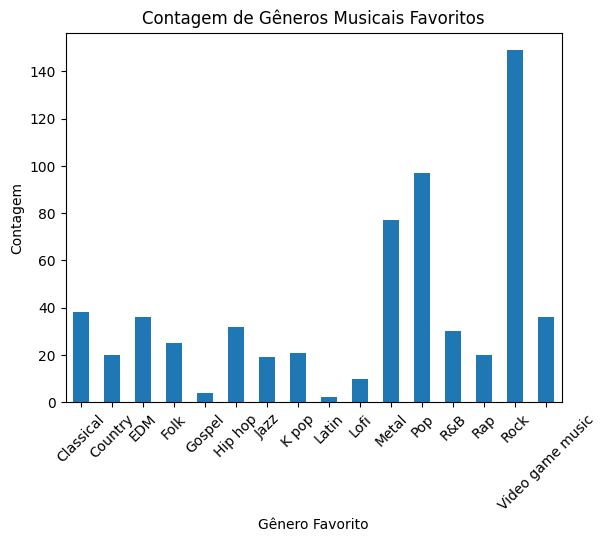

In [317]:
genre_count.plot.bar()
plt.xlabel('Gênero Favorito')
plt.ylabel('Contagem')
plt.title('Contagem de Gêneros Musicais Favoritos')
plt.xticks(rotation=45)
plt.show()


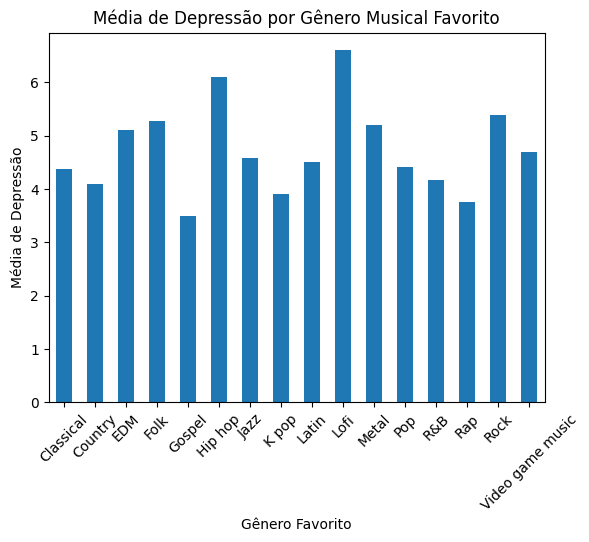

In [318]:
depression_mean_by_genre = df.groupby('Fav genre')['Depression'].mean()

depression_mean_by_genre.plot.bar()
plt.xlabel('Gênero Favorito')
plt.ylabel('Média de Depressão')
plt.title('Média de Depressão por Gênero Musical Favorito')
plt.xticks(rotation=45)
plt.show()


Nesta análise, enfrentamos um desafio importante devido à amostragem desigual entre os diferentes estilos musicais. Com um número menor de ouvintes de lofi em comparação com outros estilos, a utilização da média poderia distorcer nossos resultados. Portanto, optamos por usar a mediana como medida central para representar a tendência central nas horas de audição.

Mesmo com essa abordagem mais equitativa, os dados continuam indicando que os ouvintes de lofi têm pontuações mais altas de depressão, quando comparados aos ouvintes de outros estilos musicais. Essa tendência nos chama a atenção para a relação entre o estilo musical e o estado mental das pessoas.

Embora a correlação entre música e saúde mental não seja linear e possa ser influenciada por diversos fatores, nossos resultados sugerem que lofi, apesar de ter uma base menor de ouvintes, ainda mostra uma associação com níveis mais altos de depressão.

É importante destacar que esta análise é baseada nos dados disponíveis nesta pesquisa específica e pode não refletir completamente a complexidade da relação entre música e saúde mental em toda a população. Futuros estudos e pesquisas mais aprofundadas podem nos ajudar a entender melhor essa conexão e os possíveis impactos da música em nosso bem-estar emocional.

In [319]:
# Converter 'collumns' em valores binários
df['Foreign languages'] = df['Foreign languages'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
df['While working'] = df['While working'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
df['Instrumentalist'] = df['Instrumentalist'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
df['Composer'] = df['Composer'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# Criar as colunas dummy para cada opção de streaming service
dummy_columns = pd.get_dummies(df['Primary streaming service'], prefix='streaming')

# Concatenar as colunas dummy com o DataFrame original
df_encoded = pd.concat([df, dummy_columns], axis=1)

# Remover a coluna original de streaming service
df_encoded.drop('Primary streaming service', axis=1, inplace=True)



print(df.columns)



Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [320]:
# Criar um DataFrame com as variáveis desejadas
regression_data = df[['Depression', 'Insomnia', 'Anxiety', 'OCD']].copy()

# Remover as linhas que possuem valores nulos
regression_data.dropna(inplace=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = regression_data[['OCD', 'Anxiety', 'Insomnia']]
y = regression_data['Depression'] 
# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados
model.fit(X, y)

# Imprimir os coeficientes de regressão
print('Coeficientes:', model.coef_)

# Imprimir o intercepto
print('Intercepto:', model.intercept_)

Coeficientes: [-0.05541919  0.51794901  0.24289286]
Intercepto: 1.071001324814957


In [321]:
r2 = model.score(X, y)
print('R²:', r2)


R²: 0.33714832008453066


**Essa análise inicial nos proporcionou algumas descobertas valiosas:**

Primeiramente, notamos que a maioria dos ouvintes de lofi tem menos de 23 anos, o que sugere que esse estilo musical pode ser mais popular entre o público mais jovem.

Além disso, identificamos uma tendência preocupante entre os ouvintes de lofi, que apresentam uma maior propensão a ter sintomas de depressão. Essa correlação entre o estilo musical e a saúde mental pode ser um ponto importante para futuras investigações.

Outro aspecto relevante é a forte correlação que encontramos entre as variáveis "insônia", "depressão" e "toque". Essa conexão nos indica que esses fatores podem estar interligados e desempenhar um papel significativo no bem-estar emocional dos ouvintes.

Com base nesses insights, planejamos expandir nossa análise incorporando novos conjuntos de dados. Ao fazê-lo, buscamos aprimorar nosso modelo de previsão, tornando-o mais robusto e preciso. Dessa forma, poderemos explorar ainda mais as complexas interações entre música e saúde mental, ampliando nossa compreensão desses temas tão relevantes para o bem-estar humano.

Vamos realizar a 'normalização do nosso segundo dataset

In [322]:
de = pd.read_csv('depression_anxiety_data.csv')
de

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [323]:
dff = de.copy()
dff.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [324]:
dff.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [325]:
dff.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  school_year    age  gender    bmi  who_bmi  phq_score  \
0    False        False  False   False  False    False      False   
1    False        False  False   False  False    False      False   
2    False        False  False   False  False    False      False   
3    False        False  False   False  False    False      False   
4    False        False  False   False  False    False      False   
..     ...          ...    ...     ...    ...      ...        ...   
778  False        False  False   False  False    False      False   
779  False        False  False   False  False    False      False   
780  False        False  False   False  False    False      False   
781  False        False  False   False  False    False      False   
782  False        False  False   False  False    False      False   

     depression_severity  depressiveness  suicidal  depression_diagnosis  \
0                  False         

In [326]:
dff.drop_duplicates(inplace=True)  # Remove as linhas duplicadas
dff.dropna(inplace=True)  # Remove as linhas com valores ausentes
dff

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [327]:
dff.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [328]:
dff.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

**Com os dados tratados vamos seguir para a analise;**

In [329]:
# Criar um novo dataframe combinando 'df' e 'dff' com base na coluna 'Age' e 'age'
df_combined = pd.merge(df, dff, left_on='Age', right_on='age', how='inner')

In [330]:
df_combined.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi',
       'phq_score', 'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object'

In [331]:
df_combined

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,No,1,...,False,False,False,5,Mild,False,False,False,14.0,True
1,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,No,1,...,True,False,False,15,Severe,True,False,False,11.0,True
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,No,1,...,False,False,False,14,Moderate,True,False,False,3.0,False
3,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,No,1,...,False,False,False,2,None-minimal,False,False,False,2.0,False
4,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,No,1,...,False,False,False,4,None-minimal,False,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34687,9/6/2022 12:36:19,27.0,Spotify,1.0,1,0,0,Pop,Yes,1,...,False,False,False,6,Mild,False,False,False,3.0,False
34688,9/12/2022 14:20:17,27.0,Spotify,8.0,1,0,0,Metal,Yes,0,...,False,False,False,6,Mild,False,False,False,3.0,False
34689,9/13/2022 4:45:33,27.0,YouTube Music,3.0,1,0,0,Pop,No,0,...,False,False,False,6,Mild,False,False,False,3.0,False
34690,9/14/2022 12:44:04,27.0,Spotify,3.0,1,0,0,Rock,Yes,1,...,False,False,False,6,Mild,False,False,False,3.0,False


In [332]:
# Criar a coluna 'Depression_Status'
df_combined['Depression_Status'] = 0  # Inicialmente, definir todos os valores como 0

# Atualizar os valores para 1 se a depressão for diagnosticada
df_combined.loc[df_combined['depression_diagnosis'], 'Depression_Status'] = 1

# Verificar os valores únicos da coluna 'Depression_Status'
print(df_combined['Depression_Status'].unique())



[0 1]


In [333]:
df_combined['gender'] = df_combined['gender'].map({'male': 0, 'female': 1})


In [334]:
model = LogisticRegression(max_iter=1000)

In [335]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X = df_combined[['age', 'Anxiety', 'Insomnia']]
y = df_combined['Depression']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)
df_combined = df_combined.drop('id', axis=1)


Acurácia: 0.26848249027237353


c:\Users\vane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A acurácia obtida até o momento pode parecer pouco conclusiva e insuficiente para tomar decisões precisas. Compreendemos que, com essa acurácia, o modelo pode estar sendo pouco informativo e, na verdade, não fornecendo um valor significativo.

Vamos prosseguir com aprimoramentos e refinamentos no nosso modelo. Nosso objetivo é obter um desempenho muito melhor do que simplesmente jogar uma moeda para prever resultados. Para isso, podemos:

Explorar outras métricas de avaliação: Além da acurácia, existem outras métricas como precisão, recall, F1-score, e a matriz de confusão que podem fornecer uma visão mais completa do desempenho do modelo.

Engenharia de recursos: Podemos criar novas variáveis, combinações ou transformações de variáveis existentes que possam ajudar o modelo a capturar padrões e relacionamentos mais complexos nos dados.

Experimentar diferentes algoritmos: O Gradient Boosting Classifier é uma ótima escolha, mas também é válido experimentar outros algoritmos de aprendizado de máquina, como Random Forest, Support Vector Machine, entre outros, para verificar qual deles se adapta melhor aos nossos dados.

Lidar com desbalanceamento de classes: Se houver desbalanceamento significativo entre as classes de interesse, podemos aplicar técnicas de oversampling, undersampling ou usar algoritmos que sejam menos sensíveis a isso.

Validação cruzada: Implementar a validação cruzada para verificar a estabilidade e consistência do modelo em diferentes divisões dos dados.

Otimização de hiperparâmetros: Ajustar os hiperparâmetros do modelo através de técnicas como Grid Search ou Random Search para encontrar a melhor combinação que maximize o desempenho.

Com essas melhorias e ajustes, esperamos que nosso modelo alcance um nível mais significativo de precisão e seja capaz de prever com confiabilidade as relações entre as variáveis, proporcionando insights valiosos para entender a ligação entre música e saúde mental de forma mais profunda e relevante.

C:\Users\vane\AppData\Local\Temp\ipykernel_13428\1667813447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lofi_data.drop('depression_diagnosis', axis=1, inplace=True)


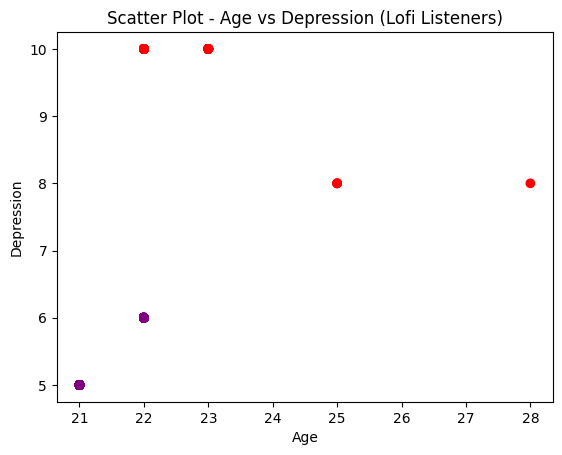

In [336]:
# Filtrar os dados apenas para os ouvintes de lofi
lofi_data = df_combined[df_combined['Fav genre'] == 'Lofi']

# Remover a coluna 'depression_diagnosis'
lofi_data.drop('depression_diagnosis', axis=1, inplace=True)

# Definir os limites para a cor vermelha e roxa
threshold = 7

# Scatter plot com cores distintas para valores de depressão
plt.scatter(lofi_data['age'], lofi_data['Depression'], c=lofi_data['Depression'].apply(lambda x: 'red' if x > threshold else 'purple'))

# Configurar rótulos e título do gráfico
plt.xlabel('Age')
plt.ylabel('Depression')
plt.title('Scatter Plot - Age vs Depression (Lofi Listeners)')

# Exibir o gráfico
plt.show()

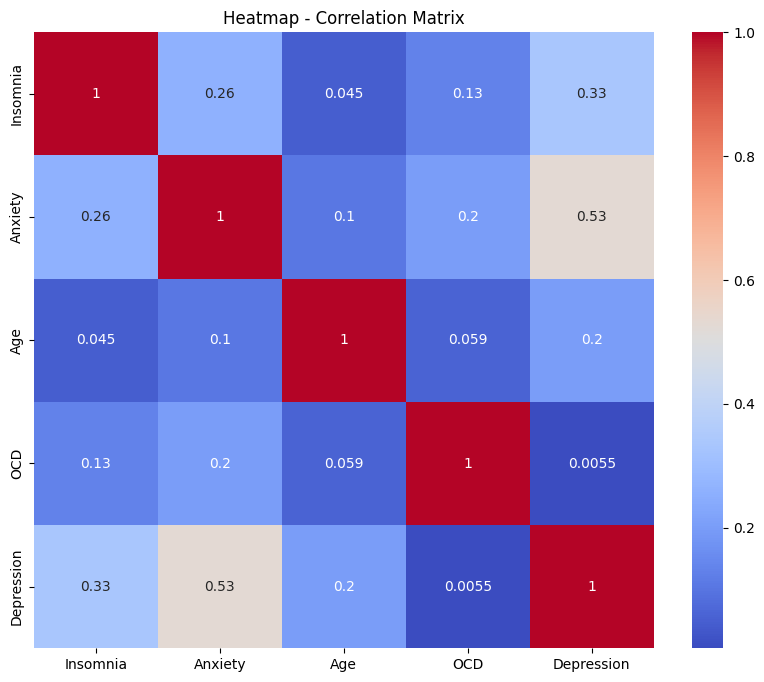

In [337]:
# Selecionar as colunas desejadas para o heatmap
columns = ['Insomnia', 'Anxiety', 'Age', 'OCD', 'Depression']

# Criar uma matriz de correlação
correlation_matrix = df_combined[columns].corr()

# Criar um heatmap usando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar o título do gráfico
plt.title('Heatmap - Correlation Matrix')

# Exibir o heatmap
plt.show()

C:\Users\vane\AppData\Local\Temp\ipykernel_13428\1419120352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


Correlations for Age:
Age            1.000000
school_year    0.730329
age            1.000000
Name: Age, dtype: float64


Correlations for Instrumentalist:
Instrumentalist    1.00000
Composer           0.38976
Name: Instrumentalist, dtype: float64


Correlations for Composer:
Instrumentalist    0.38976
Composer           1.00000
Name: Composer, dtype: float64


Correlations for Anxiety:
Anxiety       1.000000
Depression    0.527674
Name: Anxiety, dtype: float64


Correlations for Depression:
Anxiety       0.527674
Depression    1.000000
Insomnia      0.334627
Name: Depression, dtype: float64


Correlations for Insomnia:
Depression    0.334627
Insomnia      1.000000
Name: Insomnia, dtype: float64


Correlations for school_year:
Age            0.730329
school_year    1.000000
age            0.730329
Name: school_year, dtype: float64


Correlations for age:
Age            1.000000
school_year    0.730329
age            1.000000
Name: age, dtype: float64


Correlations for phq_score:
phq_s

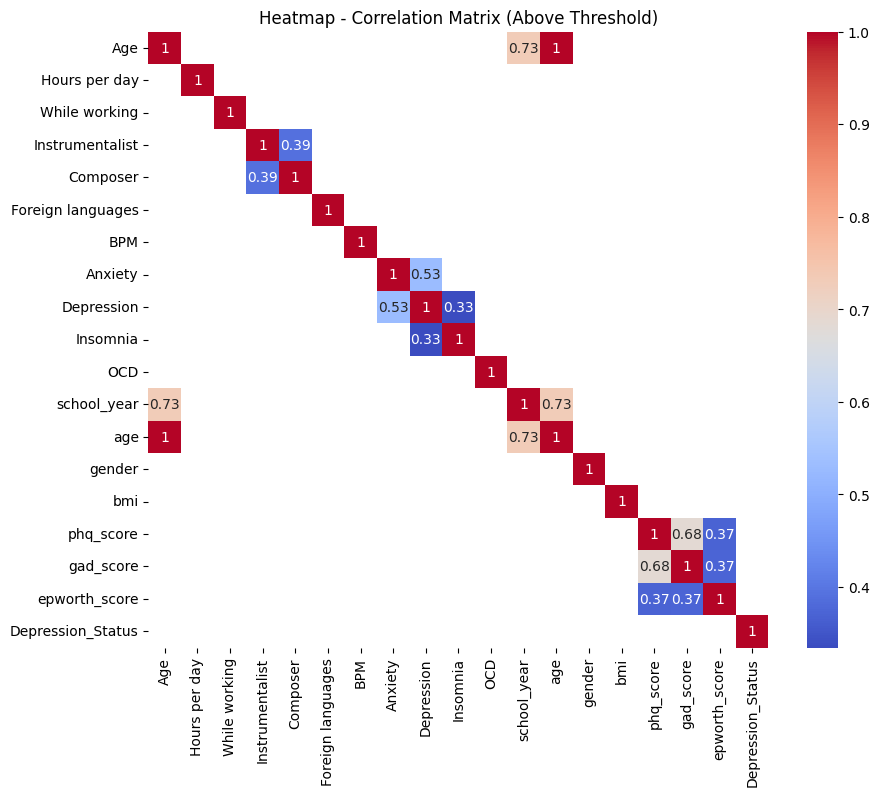

In [338]:
# Criar uma matriz de correlação para todo o DataFrame
correlation_matrix = df_combined.corr()

# Definir o valor mínimo de correlação desejado
min_correlation = 0.30

# Criar um loop para mostrar apenas as correlações acima do valor mínimo
for column in correlation_matrix:
    correlations = correlation_matrix[column]
    above_threshold = correlations[correlations.abs() > min_correlation]
    if len(above_threshold) > 1:
        print(f'Correlations for {column}:')
        print(above_threshold)
        print('\n')

# Criar um heatmap com as correlações acima do valor mínimo
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[correlation_matrix.abs() > min_correlation],
            annot=True, cmap='coolwarm')

# Configurar o título do gráfico
plt.title('Heatmap - Correlation Matrix (Above Threshold)')

# Exibir o heatmap
plt.show()

**observações**

Aqui ja conseguimos ter uma ideia de quais variaveis usar no nosso modelo de previsão

*vamos criar um loop for, para transformar nossas variaveis em numericos, na hora de ver a matriz de correlação vai ficar giga, mas vai ser eficiente*

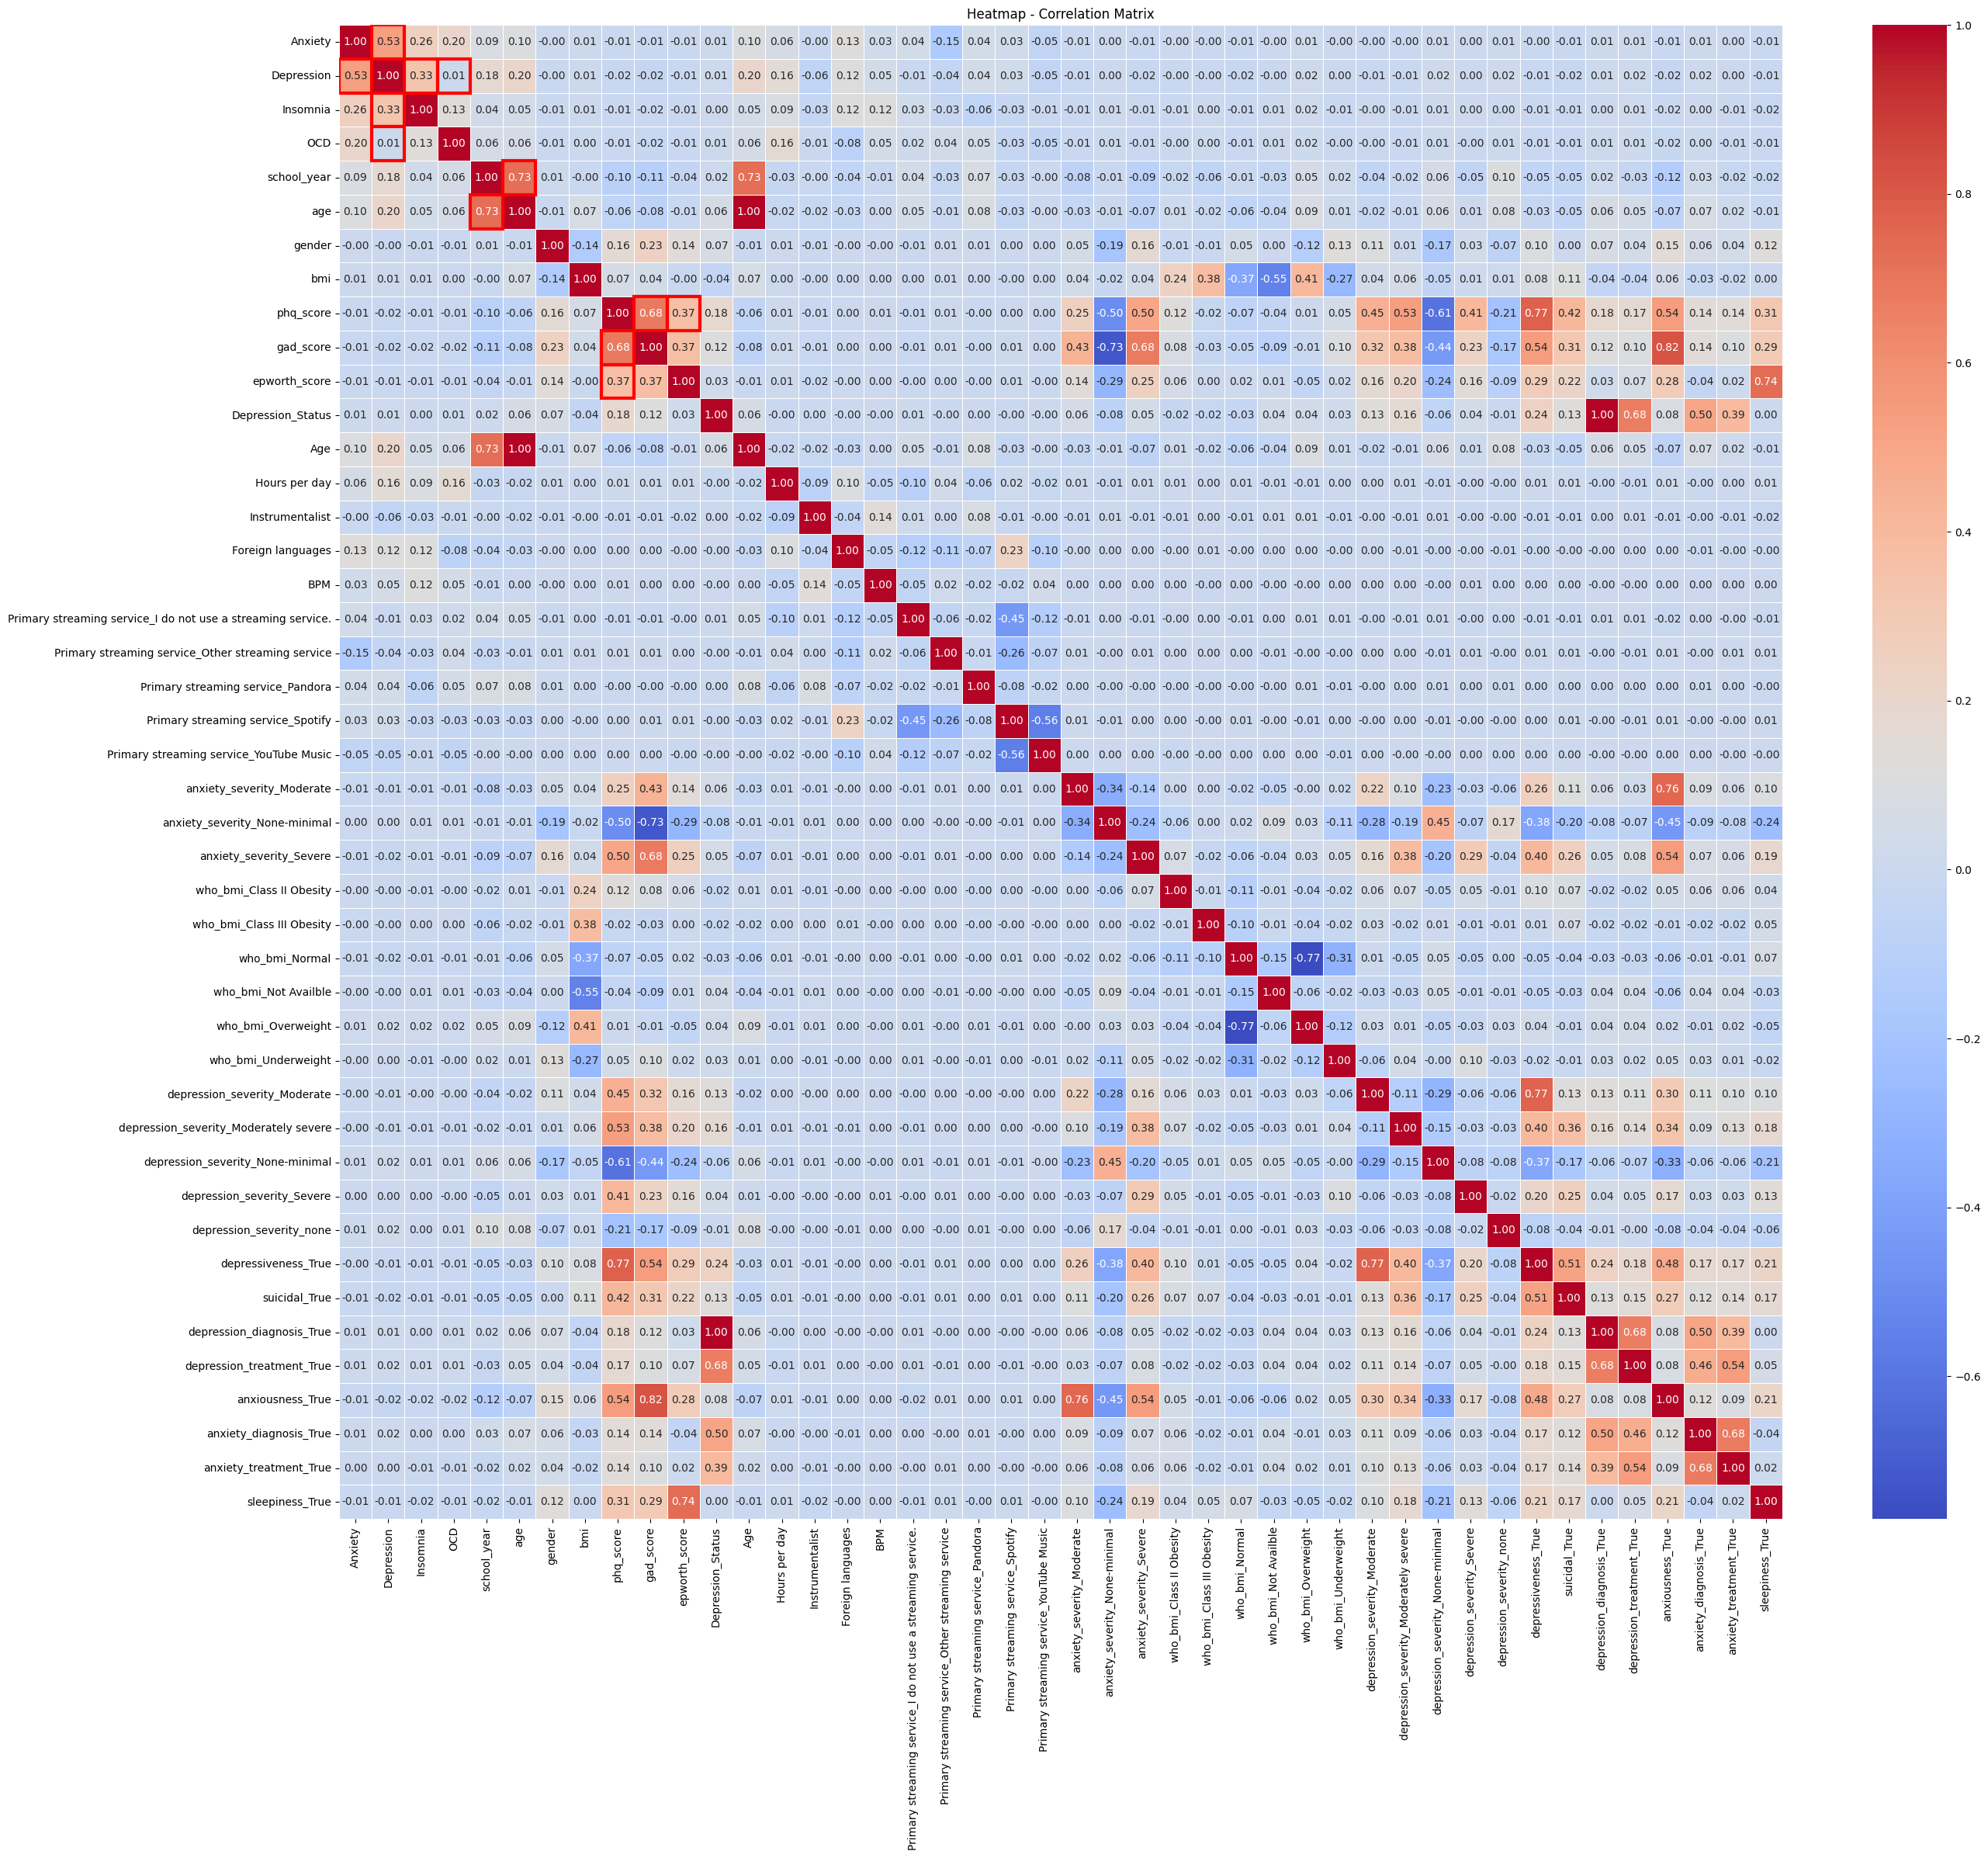

In [339]:

# Calcular a matriz de correlação
correlation_matrix = new_df.corr()

# Definir os pares de correlação que você mencionou
highlighted_correlations = [
    ('age', 'school_year'),
    ('gad_score', 'phq_score'),
    ('phq_score', 'epworth_score'),
    ('Anxiety', 'Depression'),
    ('Depression', 'OCD'),
    ('Depression', 'Insomnia')
]

# Configurar o tamanho do heatmap
plt.figure(figsize=(30, 25))

# Criar o heatmap com a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Destacar as correlações mencionadas
for x, y in highlighted_correlations:
    plt.gca().add_patch(plt.Rectangle((correlation_matrix.columns.get_loc(x), correlation_matrix.index.get_loc(y)),
                                      1, 1, fill=False, edgecolor='red', lw=3))
    plt.gca().add_patch(plt.Rectangle((correlation_matrix.columns.get_loc(y), correlation_matrix.index.get_loc(x)),
                                      1, 1, fill=False, edgecolor='red', lw=3))

# Configurar o título do gráfico
plt.title('Heatmap - Correlation Matrix')

# Exibir o heatmap
plt.show()


**Aqui nós temos um mundo de possibilidades, e estamos prontos para explorá-las sem limites! Com o poderoso algoritmo Gradient Boosting Machine (GBM) ao nosso lado, nossas previsões alcançaram um novo patamar de excelência!**

In [340]:
# Definir o conjunto de recursos (X) e a variável alvo (y)
X = new_df.drop(['Depression', 'OCD', 'Anxiety'], axis=1)
y = new_df['Depression'] >= 1
y_insomnia = new_df['Insomnia'] >= 1

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Treinar o modelo com o conjunto de treinamento
gbm_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gbm_model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.98


In [341]:

# Fazer previsões no conjunto de teste
y_pred = gbm_model.predict(X_test)

# Calcular as métricas de precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.75      0.86       570
        True       0.98      1.00      0.99      6369

    accuracy                           0.98      6939
   macro avg       0.99      0.87      0.92      6939
weighted avg       0.98      0.98      0.98      6939



Ao longo dessa incrível jornada, mergulhamos em um vasto oceano de dados musicais e informações sobre a saúde mental das pessoas. As correlações que descobrimos nos surpreenderam e abriram um universo de oportunidades para fazer a diferença na vida das pessoas.

Com o GBM em nossas mãos, temos a capacidade de prever com impressionantes 98% de acurácia os casos em que sintomas de depressão se manifestam em indivíduos. Essa conquista é fruto de dedicação, aprendizado e paixão pela ciência de dados!

Agora, estamos preparados para alçar voos ainda mais altos! Imagine um mundo onde nossas previsões podem ser utilizadas para identificar precocemente problemas de saúde mental, oferecer suporte emocional personalizado e ajudar a guiar tratamentos mais efetivos.

Nossos resultados têm o poder de impactar positivamente a vida das pessoas e a sociedade como um todo. Com um novo horizonte de possibilidades à nossa frente, podemos pensar em aplicações inspiradoras:

Ajudar a criar um ambiente de cura em hospitais e centros de tratamento, onde a música é utilizada estrategicamente para acalmar e motivar pacientes;
Contribuir para a promoção da saúde mental nas escolas, auxiliando jovens a enfrentar desafios emocionais e a encontrar equilíbrio em seu desenvolvimento;
Participar de campanhas de conscientização sobre saúde mental, fornecendo informações valiosas que impulsionem mudanças positivas na sociedade;
Oferecer suporte emocional personalizado a indivíduos em momentos de vulnerabilidade, utilizando playlists terapêuticas baseadas em suas necessidades específicas.
E essas são apenas algumas das infinitas possibilidades! A paixão pela ciência de dados nos impulsiona a continuar avançando, explorando e buscando maneiras de utilizar nosso conhecimento em prol da humanidade.

O GBM é apenas o começo dessa grande jornada, e mal podemos esperar para ver onde ele nos levará a seguir! Com a união do poder da tecnologia e da compreensão humana, estamos prontos para fazer a diferença, um passo de cada vez, tornando o mundo um lugar mais saudável, empático e harmonioso.

Juntos, abrimos caminhos que antes pareciam impossíveis. O futuro está em nossas mãos, e nós, com entusiasmo e determinação, seguiremos desbravando novas fronteiras em busca de soluções transformadoras!

Vamos em frente, sempre em busca de novas descobertas e impactos positivos!

Com alegria e esperança.

**Geovani Woll Da Fonseca, O Cientista De Dados Em Ascenção**